In [2]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from matplotlib import pyplot as plt


url = 'https://finance.naver.com/item/sise_day.nhn?code=005380&page=1'
html = requests.get(url, headers={'User-agent': 'Mozilla/5.0'}).text

# BeautifulSoup 생성자 첫번째 인수로 HTML/XML 페이지를 넘겨주고, 두번째 인수로 페이지를 파싱할 방식을 넘겨준다.
bs = BeautifulSoup(html, 'lxml')

# find 함수를 통해 'pgRR'인 'td'태그를 찾으면, 결과값은 'bs4.element.Tag'타입으로 pgrr 변수에 반환한다.
# pgRR = Page Right Right 맨 마지막 페이지를 의미한다.
pgrr = bs.find('td', class_='pgRR')


# 삼성카드 전체 페이지 수를 구하려면 pdRR 클래스 속성값으로 <td>하위의 <a> href 속성값을 구한다.
# pfgg.a['href']를 출력하면 href의 속성값인 item/sise.naver?code=029780&page=1 문자열을 얻을 수 있다.
s = str(pgrr.a['href']).split('=')

last_page = s[-1]

# 빈 데이터프레임 생성
df = pd.DataFrame()
sise_url = 'https://finance.naver.com/item/sise_day.nhn?code=005380'

for page in range(1, int(last_page)+1):
    url = '{}&page={}'.format(sise_url, page)
    html = requests.get(url, headers={'User-agent': 'Mozilla/5.0'}).text
    df = df.append(pd.read_html(html, header=0)[0])

df = df.dropna()
print(df)

<ipython-input-2-a1af9d9a9385>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.read_html(html, header=0)[0])
<ipython-input-2-a1af9d9a9385>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.read_html(html, header=0)[0])
<ipython-input-2-a1af9d9a9385>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.read_html(html, header=0)[0])
<ipython-input-2-a1af9d9a9385>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.read_html(html, header=0)[0])
<ipython-input-2-a1af9d9a9385>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fut

            날짜        종가     전일비        시가        고가        저가        거래량
1   2024.02.14  245500.0  3500.0  245000.0  251000.0  244500.0  1671003.0
2   2024.02.13  249000.0  1000.0  251000.0  261000.0  247500.0  2690468.0
3   2024.02.08  250000.0  5000.0  243000.0  250500.0  241500.0  3017429.0
4   2024.02.07  245000.0  9500.0  239000.0  246500.0  238000.0  2711612.0
5   2024.02.06  235500.0  2500.0  234000.0  240000.0  230500.0  3293825.0
..         ...       ...     ...       ...       ...       ...        ...
9   1996.07.01   31000.0   400.0   30600.0   31500.0   30600.0    26570.0
10  1996.06.29   30600.0     0.0   30600.0   30900.0   30400.0    13400.0
11  1996.06.28   30600.0   300.0   30500.0   31000.0   30300.0    69480.0
12  1996.06.27   30300.0     0.0   30300.0   30300.0   30000.0    72750.0
13  1996.06.26   30300.0   200.0   30600.0   30600.0   30300.0    54880.0

[6930 rows x 7 columns]


<ipython-input-2-a1af9d9a9385>:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.read_html(html, header=0)[0])


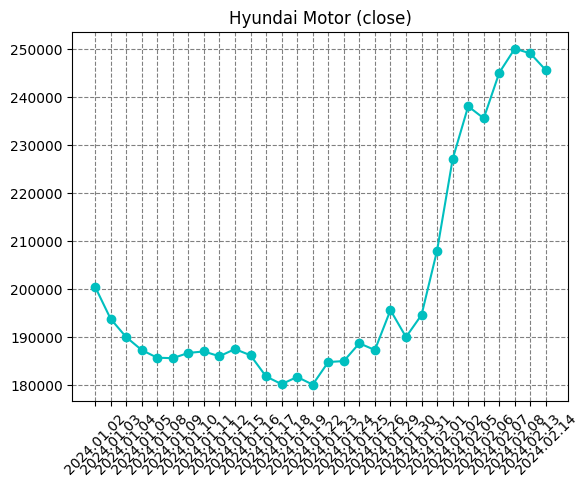

In [3]:
# 차트 출력을 위해 데이터프레임 가공하기
df = df.dropna()
df = df.iloc[0:30]
df = df.sort_values(by='날짜')

# 날짜, 종가 컬럼으로 차트 그리기
plt.title('Hyundai Motor (close)')
plt.xticks(rotation=45)
plt.plot(df['날짜'], df['종가'], 'co-')
plt.grid(color='gray', linestyle='--')
plt.show()

In [25]:
df.head()

,date,closing price,market price,opening price,high price,low price,trading volume
13,2024.01.02,200500.0,3000.0,202000.0,202500.0,199800.0,373050.0
12,2024.01.03,193800.0,6700.0,199100.0,199500.0,193800.0,548675.0
11,2024.01.04,190000.0,3800.0,192000.0,192800.0,189100.0,505979.0
10,2024.01.05,187300.0,2700.0,190100.0,190500.0,187200.0,440219.0
9,2024.01.08,185700.0,1600.0,187600.0,188900.0,185500.0,323498.0


In [31]:
df.columns = ['date', 'closing price', 'difference', 'market price', 'high price', 'low price', 'trading volume']

In [43]:
from datetime import datetime

formatted_dates = []

for date_string in df.date:
    original_date = datetime.strptime(date_string, '%Y.%m.%d')
    formatted_date = original_date.strftime('%Y%m%d')
    formatted_dates.append(formatted_date)

# 변환된 값을 DataFrame에 할당
df['date'] = formatted_dates

In [53]:
import pandas as pd

df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
df['date'] = df['date'].dt.strftime('%Y%m%d').astype(float)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 13 to 1
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            30 non-null     float64
 1   closing price   30 non-null     float64
 2   difference      30 non-null     float64
 3   market price    30 non-null     float64
 4   high price      30 non-null     float64
 5   low price       30 non-null     float64
 6   trading volume  30 non-null     float64
dtypes: float64(7)
memory usage: 2.9 KB


In [55]:
df.isnull().sum()

date              0
closing price     0
difference        0
market price      0
high price        0
low price         0
trading volume    0
dtype: int64

In [56]:
df.head()

,date,closing price,difference,market price,high price,low price,trading volume
13,20240102.0,200500.0,3000.0,202000.0,202500.0,199800.0,373050.0
12,20240103.0,193800.0,6700.0,199100.0,199500.0,193800.0,548675.0
11,20240104.0,190000.0,3800.0,192000.0,192800.0,189100.0,505979.0
10,20240105.0,187300.0,2700.0,190100.0,190500.0,187200.0,440219.0
9,20240108.0,185700.0,1600.0,187600.0,188900.0,185500.0,323498.0


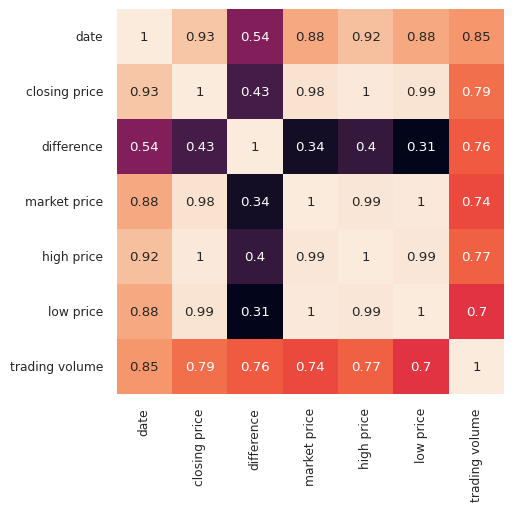

In [57]:
import seaborn as sns

#상관 관계 행렬
df_corr=df.corr()

#히트맵
plt.figure(figsize=(5,5))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [58]:
X=df.drop('closing price',axis=1)
X

,date,difference,market price,high price,low price,trading volume
13,20240102.0,3000.0,202000.0,202500.0,199800.0,373050.0
12,20240103.0,6700.0,199100.0,199500.0,193800.0,548675.0
11,20240104.0,3800.0,192000.0,192800.0,189100.0,505979.0
10,20240105.0,2700.0,190100.0,190500.0,187200.0,440219.0
9,20240108.0,1600.0,187600.0,188900.0,185500.0,323498.0
5,20240109.0,100.0,187800.0,187800.0,185500.0,349068.0
4,20240110.0,1100.0,185600.0,187300.0,185200.0,330767.0
3,20240111.0,300.0,187200.0,189000.0,187000.0,538799.0
2,20240112.0,1000.0,186600.0,187400.0,185800.0,240690.0
1,20240115.0,1500.0,186000.0,188600.0,185800.0,251099.0


In [59]:
y=df['closing price']
y

13    200500.0
12    193800.0
11    190000.0
10    187300.0
9     185700.0
5     185600.0
4     186700.0
3     187000.0
2     186000.0
1     187500.0
13    186200.0
12    181800.0
11    180200.0
10    181700.0
9     180100.0
5     184800.0
4     185000.0
3     188700.0
2     187300.0
1     195600.0
13    190000.0
12    194600.0
11    208000.0
10    227000.0
9     238000.0
5     235500.0
4     245000.0
3     250000.0
2     249000.0
1     245500.0
Name: closing price, dtype: float64

In [60]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=423)

In [61]:
from sklearn.svm import SVR

clf_svm = SVR()
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Regressor ---")
print(pred_svm)
print(clf_svm.score(X_train, y_train))


--- SVM Regressor ---
[188100.08047427 188100.10244488 188099.99481857 188100.06584822
 188099.99295401 188099.95708374]
-0.38173398890387134


In [64]:
import numpy as np
from sklearn.metrics import mean_squared_error

mse = np.sqrt(mean_squared_error(pred_svm, y_test))
print('평균제곱근오차', mse)

평균제곱근오차 4933.67556222781


In [67]:
X_test.head()

,date,difference,market price,high price,low price,trading volume
12,20240131.0,4600.0,189300.0,195400.0,188500.0,1053355.0
1,20240129.0,8300.0,187300.0,197300.0,186600.0,1199045.0
12,20240117.0,4400.0,186300.0,186400.0,181000.0,481127.0
13,20240130.0,5600.0,196000.0,196600.0,189300.0,955999.0
2,20240126.0,1400.0,189300.0,189600.0,186500.0,468376.0
